# k-means clustering 

In [1]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

In [2]:
directory = 'C:/Users/passion/jupyter_notebook/공모전/강양이 방범대(교통사고 분석 및 예측)/time_series_clustering data/'

mySeries = []
namesofMySeries = []
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):
        df = pd.read_excel(directory+filename)
        df = df.loc[:,["RECV_CPLT_DM","accident_num"]]
        df.set_index("RECV_CPLT_DM",inplace=True)
        df.sort_index(inplace=True)
        mySeries.append(df)
        namesofMySeries.append(filename[:-4])

In [3]:
x = mySeries[0].index
x

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31'],
              dtype='datetime64[ns]', name='RECV_CPLT_DM', freq=None)

In [4]:
print(len(mySeries))

60


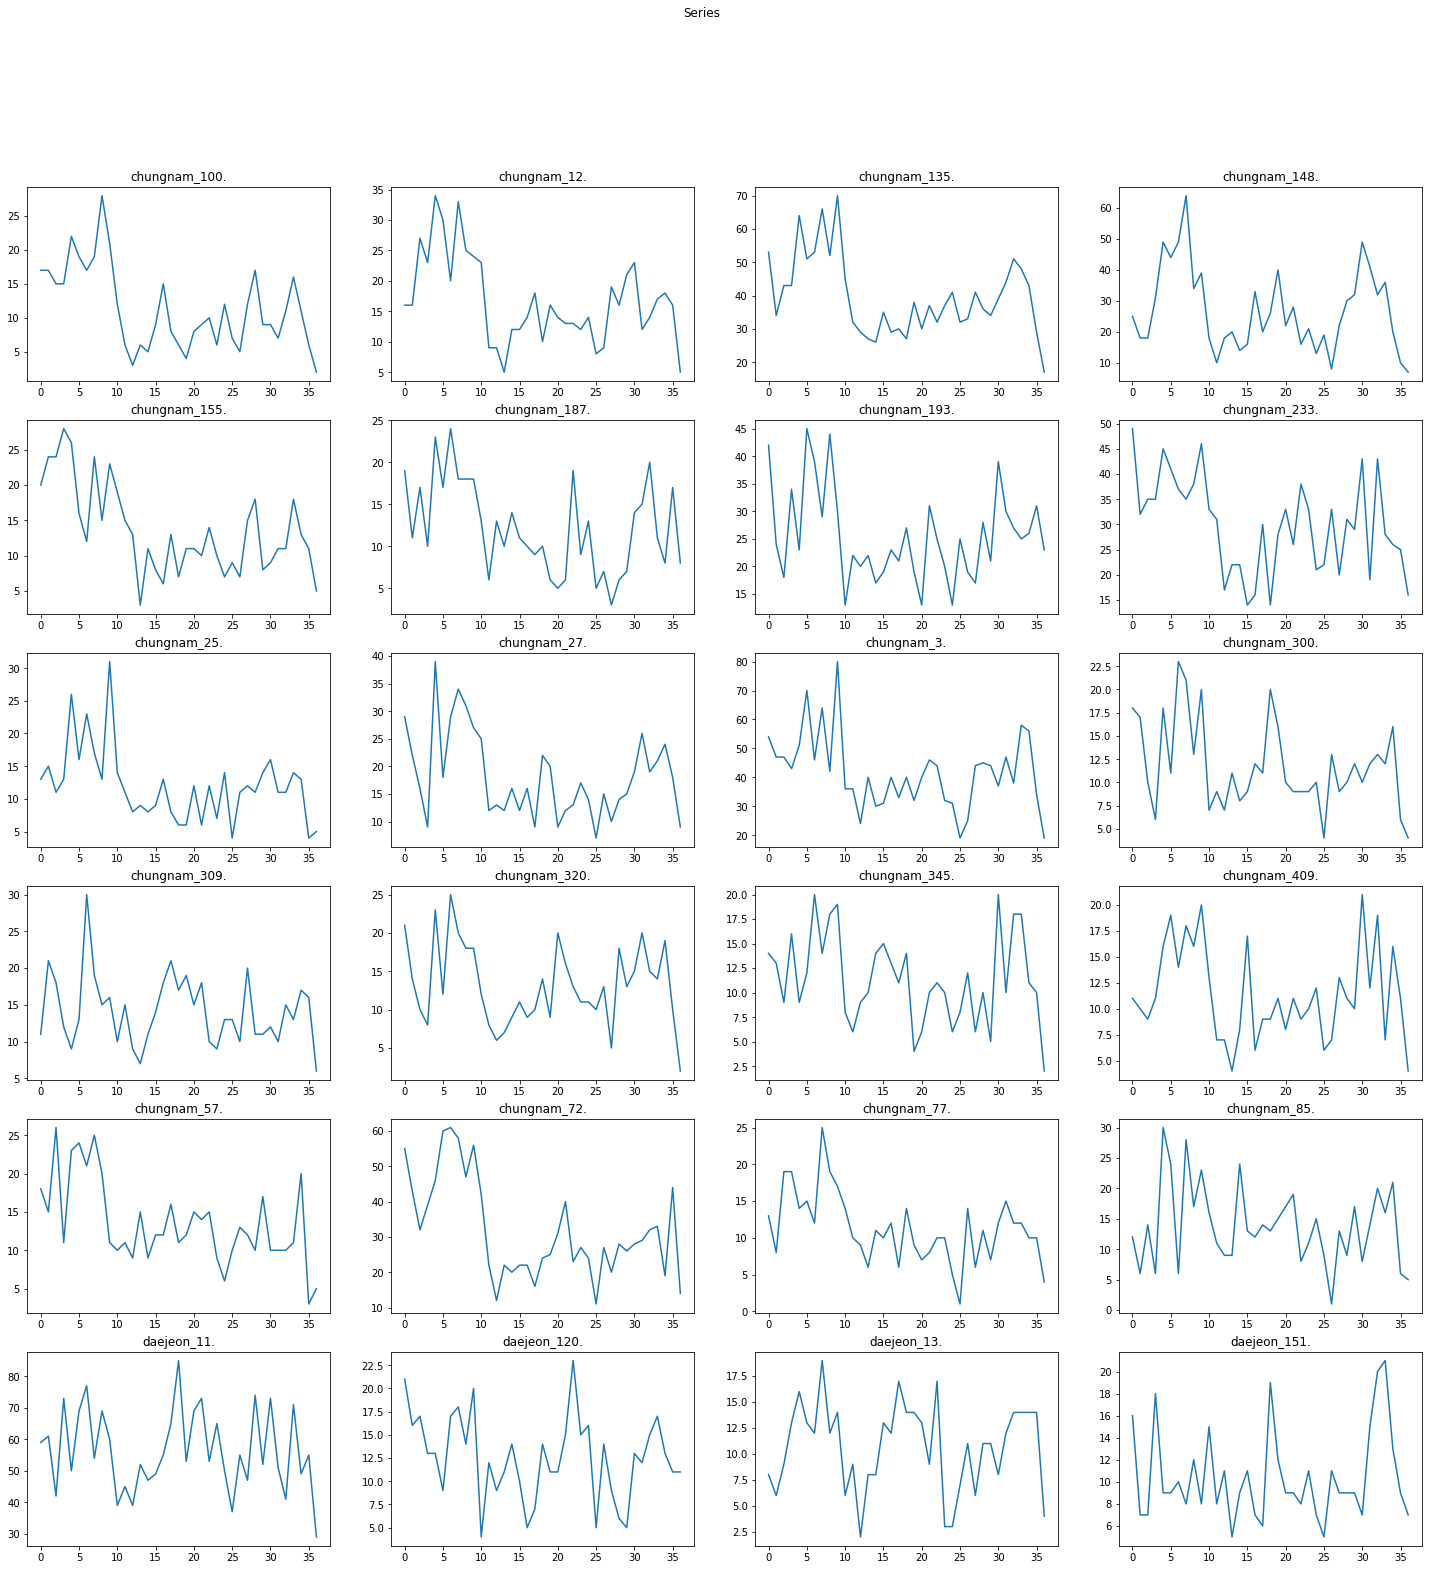

In [5]:
fig, axs = plt.subplots(6,4,figsize=(25,25))
fig.suptitle('Series')
for i in range(6):
    for j in range(4):
        if i*4+j+1>len(mySeries):
            continue
        axs[i, j].plot(mySeries[i*4+j].values)
        axs[i, j].set_title(namesofMySeries[i*4+j])
plt.show()

In [6]:
series_lengths = {len(series) for series in mySeries}
print(series_lengths)

{37}


In [7]:
mySeries

[              accident_num
 RECV_CPLT_DM              
 2020-01-31              17
 2020-02-29              17
 2020-03-31              15
 2020-04-30              15
 2020-05-31              22
 2020-06-30              19
 2020-07-31              17
 2020-08-31              19
 2020-09-30              28
 2020-10-31              21
 2020-11-30              12
 2020-12-31               6
 2021-01-31               3
 2021-02-28               6
 2021-03-31               5
 2021-04-30               9
 2021-05-31              15
 2021-06-30               8
 2021-07-31               6
 2021-08-31               4
 2021-09-30               8
 2021-10-31               9
 2021-11-30              10
 2021-12-31               6
 2022-01-31              12
 2022-02-28               7
 2022-03-31               5
 2022-04-30              12
 2022-05-31              17
 2022-06-30               9
 2022-07-31               9
 2022-08-31               7
 2022-09-30              11
 2022-10-31         

In [8]:
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

In [9]:
print("max: "+str(max(mySeries[0]))+"\tmin: "+str(min(mySeries[0])))
print(mySeries[0][:5])

max: 1.0000000000000002	min: 0.0
[0.57692308 0.57692308 0.5        0.5        0.76923077]


# 전처리 후 elbow로 최적의 클러스터 찾기

In [10]:
elbow_data = []
for n_clusters in range (1,10):
    km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=42,n_jobs=-1)
    y_pred = km.fit_predict(mySeries)
    elbow_data.append((n_clusters, km.inertia_))
df = pd.DataFrame(elbow_data,columns=['clusters', 'inertia'])
display(df)

,clusters,inertia
0,1,1.831189
1,2,1.634841
2,3,1.497420
3,4,1.420277
4,5,1.353526
5,6,1.375219
6,7,1.307489
7,8,1.274254
8,9,1.243127


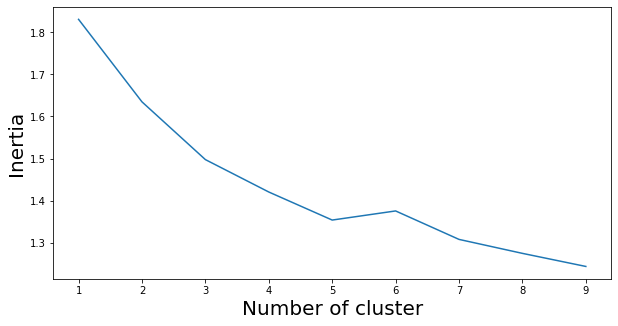

In [11]:
plt.figure(figsize = (10,5))
plt.plot(df['clusters'], df['inertia'])
plt.xlabel('Number of cluster', fontdict={'size': 20})
plt.ylabel('Inertia',fontdict={'size': 20})
plt.show()

5랑 7을 elbow포인트로 잡고 cluster 각각의 cluster를 눈으로 확인해보겠습니다

# 클러스터 5개일때

In [12]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(mySeries))))
cluster_count = 5

km = TimeSeriesKMeans(n_clusters=cluster_count,random_state=3, metric="dtw")

labels = km.fit_predict(mySeries)

In [13]:
list = [1.255,1.31564,1.56165,1.74465]
a = np.round(list, 1)
a

array([1.3, 1.3, 1.6, 1.7])

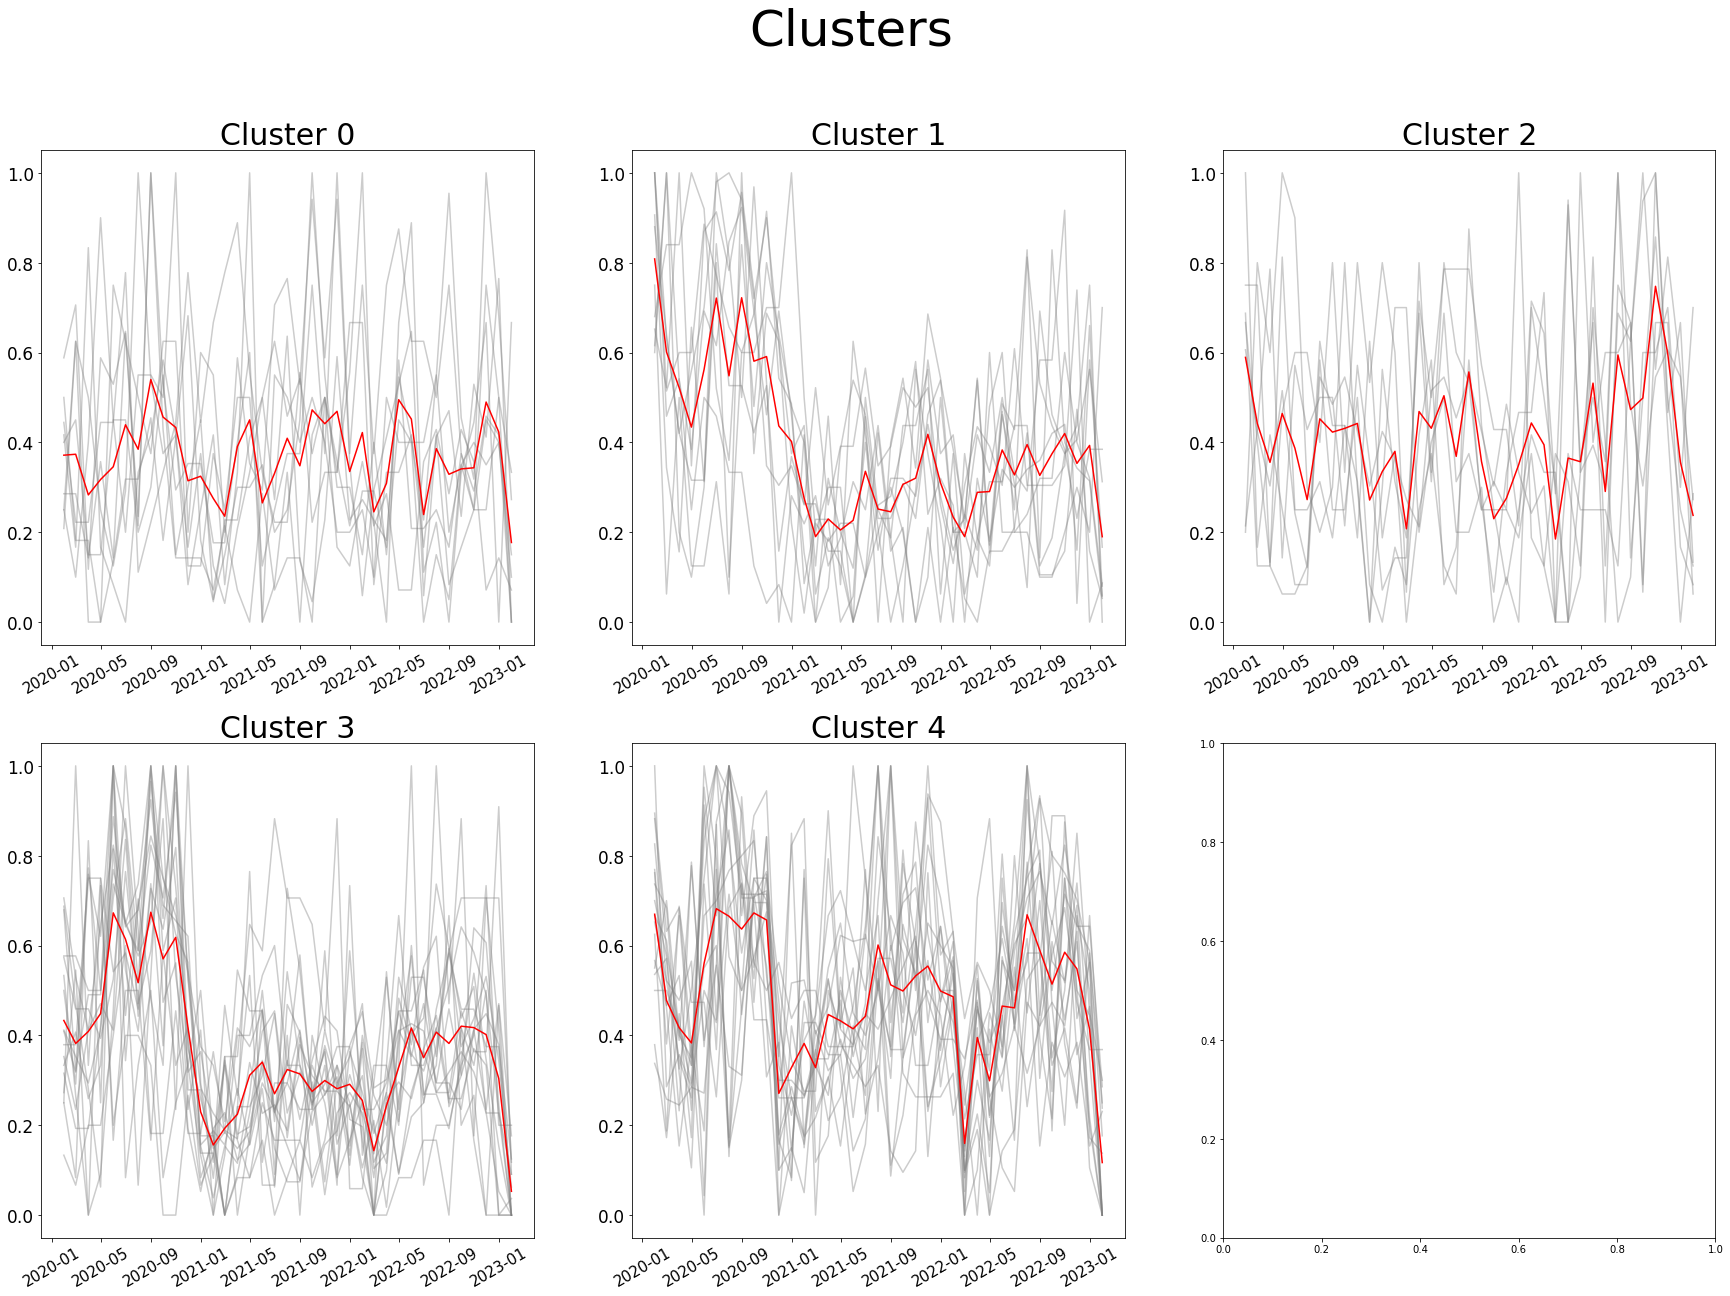

In [14]:
timeFormat = mdates.DateFormatter('%Y-%m')
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(2,3,figsize=(30,20))
fig.suptitle('Clusters', fontsize=50)
row_i=0
column_j=0

for label in set(labels):
    cluster = []
    
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(x,mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(x,np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j), fontsize=30)
    axs[row_i, column_j].set_xticklabels(axs[row_i, column_j].get_xticks(), rotation = 30,fontsize=15)
    axs[row_i, column_j].set_yticklabels(np.round(axs[row_i, column_j].get_yticks(),1),fontsize=17)
    axs[row_i, column_j].xaxis.set_major_formatter(timeFormat)
    
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.show()

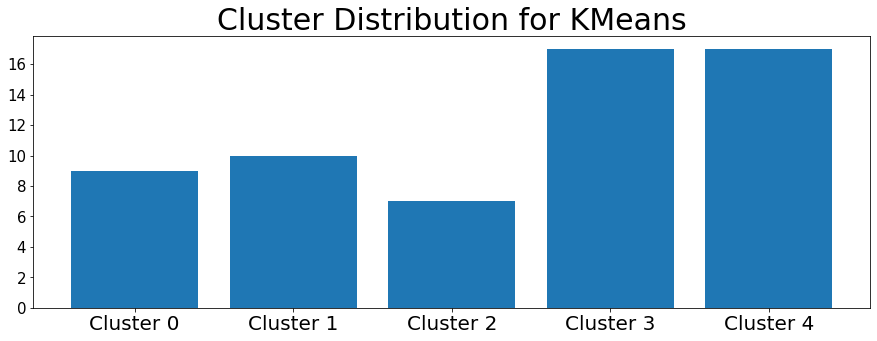

In [17]:
cluster_c = [len(labels[labels==i]) for i in range(5)]
cluster_n = ["Cluster "+str(i) for i in range(5)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans", fontdict = {'fontsize' : 30})
plt.bar(cluster_n,cluster_c)
plt.rc('xtick', labelsize=20)  
plt.rc('ytick', labelsize=15)
plt.show()

In [16]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

,Cluster
Series,
sejong_16.,Cluster 0
sejong_34.,Cluster 0
daejeon_98.,Cluster 0
sejong_43.,Cluster 0
sejong_1.,Cluster 0
sejong_13.,Cluster 0
sejong_30.,Cluster 0
chungnam_309.,Cluster 0
daejeon_249.,Cluster 0
